## Linear Regression - PART II

In [258]:
#Import all libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
#Reading data and printing shape
df_size = pd.read_csv('/Users/deepakrajmohanraj/Desktop/UB/Assignments/Spring 2023/CSE 574/Assignment 1/datasets 2/diamond.csv', sep=',')
df_size.shape


(53940, 11)

In [260]:
#To determine the number of na present in each column in the dataset
nan_count = df_size.isna().sum()
print(nan_count)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [261]:
df=df_size
df.shape

(53940, 11)

In [262]:
#Taking a peak at the dataset
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [263]:
# Print the main statistic about the dataset
print(df.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [264]:
# To get the unique values of each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values of {col}: {unique_values}\n")

Unique values of Unnamed: 0: [    1     2     3 ... 53938 53939 53940]

Unique values of carat: [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31

In [265]:
# Isolating the categorical columns and removing the column "Unnamed: 0" as it does not provide any meaning to the data
df_x = df.drop(["Unnamed: 0","cut","color","clarity","price"], axis=1)
df_x = df_x.apply(lambda x: ((x - x.min())/(x.max() - x.min())).round(2))
df_y = df["price"]
df_cat = df[["cut","color","clarity"]]
df_cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


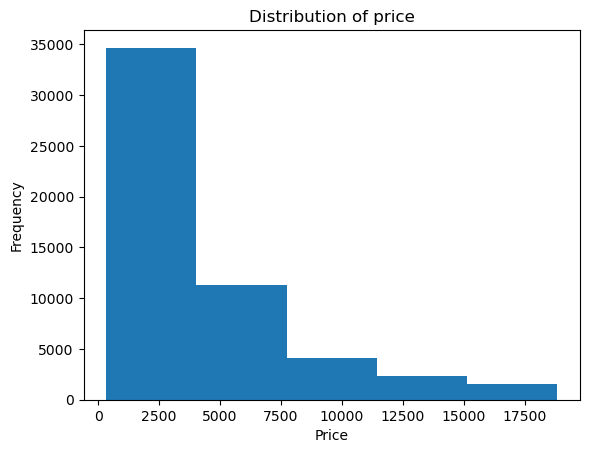

In [266]:
# Histogram plot between the target(price) of the diamond and the overall distribution of the dataset.
plt.hist(df['price'], bins=5)

# set the axis labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of price')

# show the plot
plt.show()

<b>Based on the graph above, it can be observed that the target is primarily focused on values below 2500, and there are only a small number of diamonds with prices as high as 17500.</b>

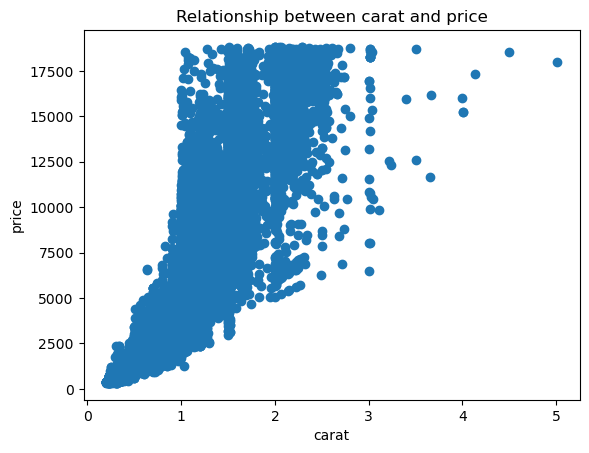

In [267]:
# Scatter plot between the carat and target(price) of the diamond.
plt.scatter(df['carat'], df['price'])

# set the axis labels and title
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Relationship between carat and price')

# show the plot
plt.show()

<b>Based on the graph above, it can be observed that carat weight is predominantly concentrated below 2, and only a limited number of diamonds have a weight greater than 3, with prices that reflect their rarity. Furthermore, the graph indicates that diamond prices experience a sudden increase before reaching 1 carat in weight.</b>

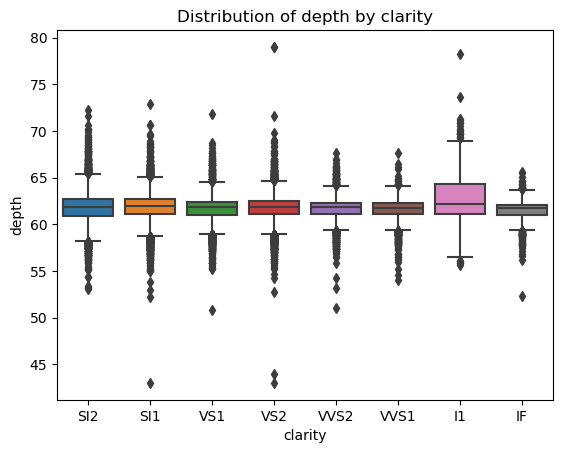

In [268]:
# Boxplot plot between the clarity and depth of the diamond.
sns.boxplot(x='clarity', y='depth', data=df)

# set the axis labels and title
plt.xlabel('clarity')
plt.ylabel('depth')
plt.title('Distribution of depth by clarity')

# show the plot
plt.show()

<b>The graph above demonstrates that L1 clarity diamonds are distributed across a wide range of depths, and outliers in terms of depth are present for diamonds with VS2 and LSI clarity. Interestingly, the median depth for all clarity types is nearly identical, and there is no evidence of skewness in the clarity data.</b>

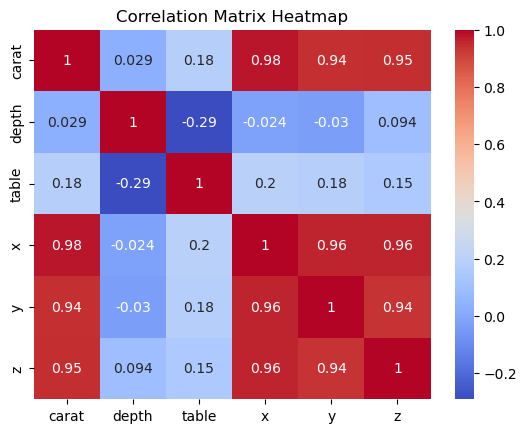

In [269]:
# Heatmap plot between the clarity and depth of the diamond.
sns.heatmap(df_x.corr(), annot=True, cmap='coolwarm')

# set the title
plt.title('Correlation Matrix Heatmap')

# show the plot
plt.show()

<b>The graph above clearly indicates a strong correlation between the X, Y, and Z dimensions of the diamond. Moreover, it is noteworthy that these dimensions display a significant correlation with the carat weight, while exhibiting only weak correlations with depth and table measurements.</b>

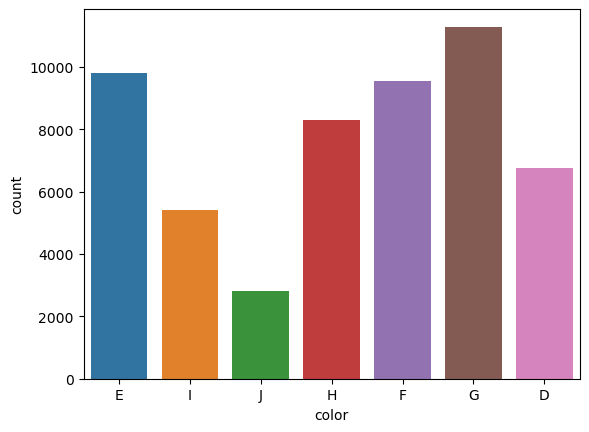

In [270]:
# Countplot plot for the color of the diamond.
sns.countplot(x="color", data=df)
plt.show()

<b>Upon observing the graph above, it is evident that the brown color of the diamond is the most frequently occurring color in the dataset. In contrast, the green color is the least commonly found color. This implies that brown diamonds are more prevalent and widely available, whereas green diamonds are much rarer and less commonly found</b>

In [271]:
df_x.head()

,carat,depth,table,x,y,z
0,0.01,0.51,0.23,0.37,0.07,0.08
1,0.00,0.47,0.35,0.36,0.07,0.07
2,0.01,0.39,0.42,0.38,0.07,0.07
3,0.02,0.54,0.29,0.39,0.07,0.08
4,0.02,0.56,0.29,0.40,0.07,0.09


In [272]:
#One hot encoding the categorical columns and combining them into one input data
df_x_encoded = pd.get_dummies(df_cat,drop_first=True)
df_final = pd.concat([df_x_encoded, df_x[df_x.columns.difference(["cut","color","clarity","price"])]], axis=1)
df_final.reset_index(drop=True)
df_final.columns

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'carat', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [273]:
#Splitting the data into test and training dataset
X_train = df_final.sample(frac=0.8,random_state=200)
print(X_train.shape)
X_test = df_final.drop(X_train.index)
print(X_test.shape)
y_train = df_y.sample(frac=0.8,random_state=200)
print(y_train.shape)
y_test = df_y.drop(y_train.index)
print(y_test.shape)

(43152, 23)
(10788, 23)
(43152,)
(10788,)


In [274]:
#Calculate the weights with the OLS equation
w_linear = np.linalg.inv(df_final.transpose().dot(df_final)).dot(df_final.transpose()).dot(df_y)

In [275]:
w_linear

array([  612.02906779,   895.83800136,   817.59601124,   769.10749001,
        -208.69177699,  -276.03859687,  -482.94791129,  -975.76351745,
       -1455.5555568 , -2345.99917949,  5365.05045553,  3661.66035828,
        2700.8005141 ,  4583.63372775,  4271.78216934,  5019.83482082,
        4957.17524938, 52956.81964457, -2034.48198562, -1234.13404496,
       -9511.37402409, -4020.57489033,   429.11631482])

In [276]:
#Saving the model weights in pickle file
with open('dmohanra_zemingzh_assignment1_part2.pickle','wb') as file:
   pickle.dump(w_linear,file)

In [277]:
#Get the predictions and calculating the sum of squared errors
y_pred_linear = df_final.dot(w_linear)
mse_linear = np.mean((df_y - y_pred_linear)**2)
print(mse_linear)

1318453.2574061984


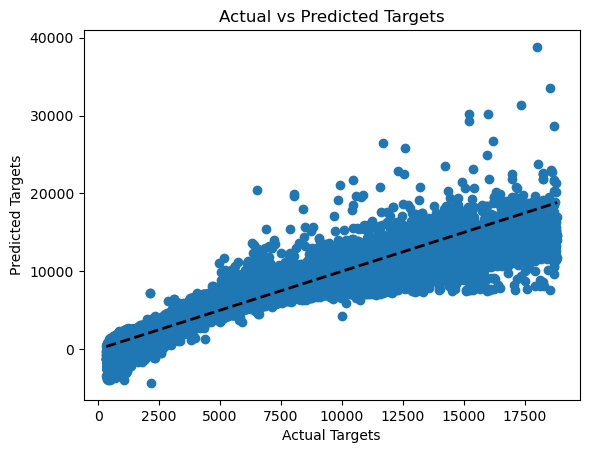

In [285]:
# create a scatter plot of the actual targets and predictions
plt.scatter(df_y, y_pred_linear)

# add a diagonal line to represent perfect predictions
plt.plot([df_y.min(), df_y.max()], [df_y.min(), df_y.max()], 'k--', lw=2)

# set the axis labels and title
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Targets')
plt.title('Actual vs Predicted Targets')

# show the plot
plt.show()

<b>Upon examining the graph of the actual and predicted target values of the linear regression model, we can observe that the predicted values are tightly clustered near or around the line of perfect or correct prediction, indicating that our model has good overall precision performance. Furthermore, upon evaluating each predicted target value, we can see that there is less to no marginal error observed from the actual value. Overall, our model demonstrates high precision performance.</b>

## Ridge Regression - PART III

In [279]:
# OLS equation for Ridge regression can be estimated as

lambda_value = 0.1  # set the regularization parameter to some value
I = np.eye(df_final.shape[1])  # create an identity matrix with the same dimensions as X
w_ridge = np.linalg.inv(df_final.transpose().dot(df_final) + lambda_value*I).dot(df_final.transpose()).dot(df_y)
print(w_ridge)

[  606.31700678   886.65413352   810.46207564   762.1597349
  -209.43859937  -276.93633816  -483.36328778  -975.52159836
 -1454.46410687 -2344.25103117  5350.64266508  3647.27272254
  2687.22858536  4569.06102894  4257.50448095  5005.8619652
  4942.99302053 52800.0375172  -2072.82676629 -1278.45030798
 -9394.24784774 -3863.96498513   391.5407175 ]


In [280]:
#Saving the model weights in pickle file
with open('dmohanra_zemingzh_assignment1_part3.pickle','wb') as file:
   pickle.dump(w_ridge,file)

In [281]:
# the squared loss can be written as:
y_pred_ridge = df_final.dot(w_ridge)
mse_ridge = 0.5*np.sum((df_y - y_pred_ridge)**2) + (lambda_value * np.dot(w_ridge, w_ridge))
print(mse_ridge)

35863807174.385956


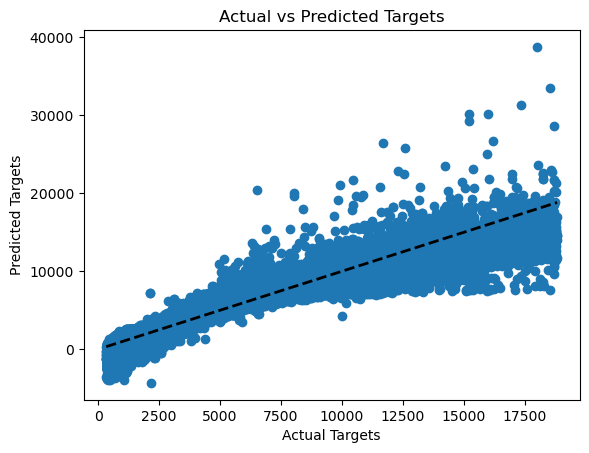

In [282]:
# create a scatter plot of the actual targets and predictions
plt.scatter(df_y, y_pred_ridge)

# add a diagonal line to represent perfect predictions
plt.plot([df_y.min(), df_y.max()], [df_y.min(), df_y.max()], 'k--', lw=2)

# set the axis labels and title
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Targets')
plt.title('Actual vs Predicted Targets')

# show the plot
plt.show()

<b>Based on the actual and predicted target graph of the ridge regression, we can see that the predicted values are clustered near or along the line of perfect or correct prediction, indicating good overall precision performance of our model. In general, the precision of our model is good, as we do not see a significant deviation of predicted values from the actual values. However, we observe that our model has lower accuracy for bigger target values as compared to smaller target values.</b>

In [283]:
mse_linear

1318453.2574061984

In [284]:
mse_ridge

35863807174.385956